# RNN Example for Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [2]:
df = pd.read_csv('../dataset/Miles_Traveled.csv',index_col='DATE',parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [5]:
df.columns = ['Value']

**TASK: Plot out the time series**

<Axes: xlabel='DATE'>

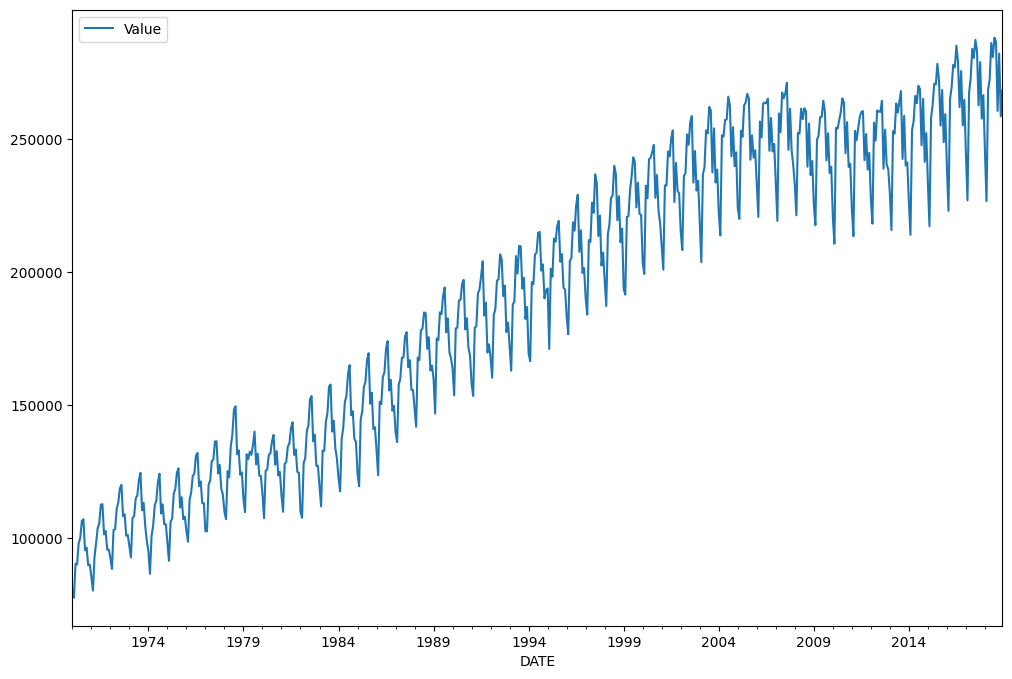

In [6]:
df.plot(figsize=(12,8))

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
results = seasonal_decompose(df['Value'])

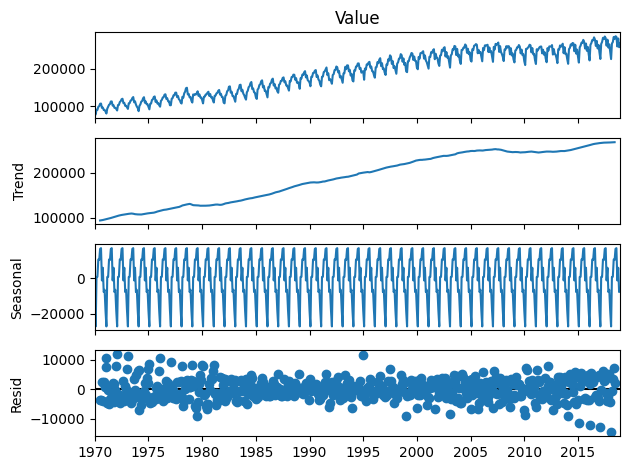

In [9]:
results.plot();

<Axes: xlabel='DATE'>

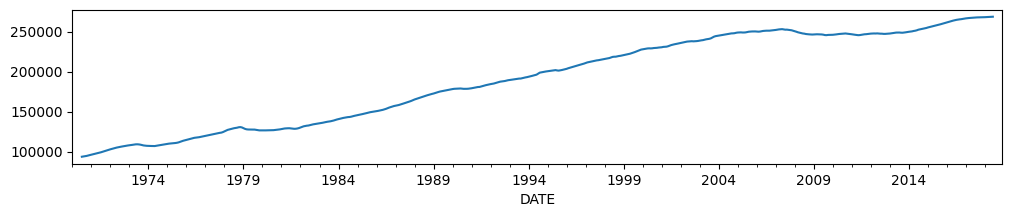

In [10]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

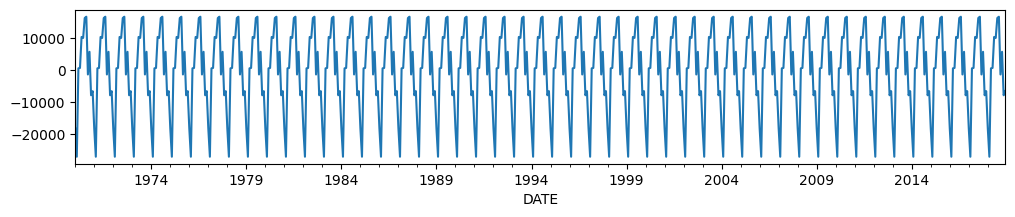

In [11]:
results.seasonal.plot(figsize=(12,2))

## Train Test Split

**TASK: Figure out the length of the data set**

In [12]:
len(df)

588

In [13]:
588 - 12

576

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [14]:
train = df.iloc[:576]

In [15]:
test = df.iloc[576:]

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)

In [21]:
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore

In [23]:
n_input = 24
n_features = 1

In [24]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,
                                batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [25]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense,LSTM # type: ignore

In [26]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [28]:
model.fit(generator,epochs=30)

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


552/552 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0271
Epoch 2/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0065
Epoch 3/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0053
Epoch 4/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0053
Epoch 5/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0055
Epoch 6/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0034
Epoch 7/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0025
Epoch 8/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0019
Epoch 9/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0019
Epoch 10/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0016
Epoch 11/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0017
Epoch 12/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014
Epoch 13/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014
Epoch 14/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011
Epoch 15/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0013


**TASK: Plot the history of the loss that occured during training.**

In [29]:
loss_per_epoch = model.history.history['loss']

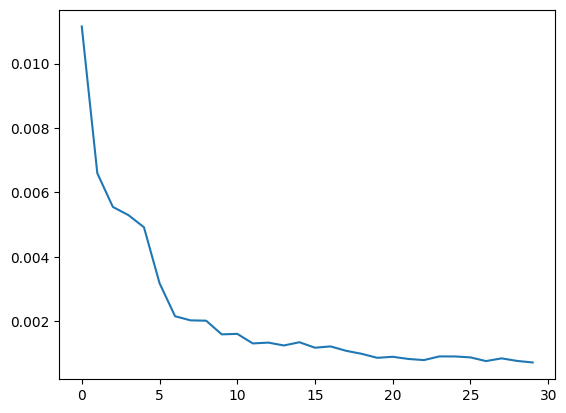

In [30]:
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [31]:
first_eval_batch = scaled_train[-12:]

In [32]:
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [33]:
first_eval_batch = first_eval_batch.reshape((1,12,n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:] # used the previous 12 historical points of the train set to predict the first value in the training set
current_batch = first_eval_batch.reshape((1,n_input,n_features)) # reshape this to the format RNN wants(same format as TimeseriesGenerator)

# how far into the future will I forecast ? len(test) 
for i in range(len(test)):
    
    # get prediction 1 time step ahead of historical 12 points([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update current batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
true_predictions

array([[249094.13039607],
       [235636.38037562],
       [271608.65978926],
       [276780.4627617 ],
       [283498.53445905],
       [283120.96274042],
       [288526.64774036],
       [284232.13382596],
       [272155.91921192],
       [279939.79683852],
       [265949.02499825],
       [268531.44840574]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [37]:
test['Predictions'] = true_predictions

C:\Users\adepa\AppData\Local\Temp\ipykernel_22564\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [38]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,249094.130396
2018-02-01,226660.0,235636.380376
2018-03-01,268480.0,271608.659789
2018-04-01,272475.0,276780.462762
2018-05-01,286164.0,283498.534459
2018-06-01,280877.0,283120.962740
2018-07-01,288145.0,288526.647740
2018-08-01,286608.0,284232.133826
2018-09-01,260595.0,272155.919212


**TASK: Plot out the test set against your own predicted values.**

<Axes: xlabel='DATE'>

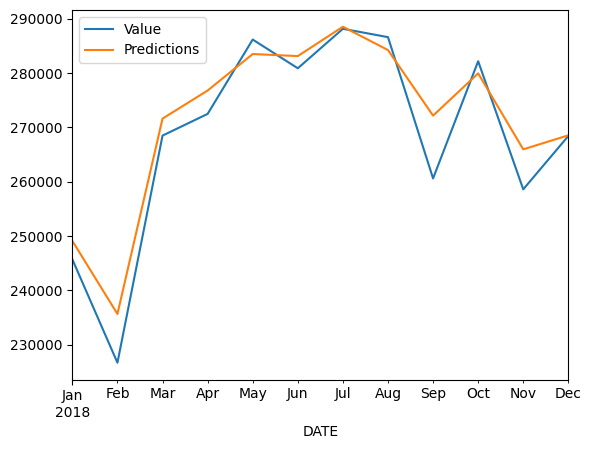

In [39]:
test.plot()